# <center> Heart Failure Discharge Analysis


**Objective:**  We want to understand drivers of readmission and mortality, then build a model to predict high‑risk patients
Analyze hospital discharge data from heart failure patients to:
1.Understand the data (*Descriptive analysis*)
2.Explore why patterns happen (*Diagnostic analysis*)
3.Build a model to predict high‑risk patients (*Predictive analysis*)
4.Recommend interventions (*Prescriptive analysis*)

Data source: [PhysioNet Heart Failure Zigong dataset v1.3](https://physionet.org/content/heart-failure-zigong/1.3/)


### Data definition and exploration

The main goal is to 
1.Read dataset(s)
2.Understand variables & dtypes
3.Clean missing values
4.Create new features: e.g., admission weekday, number of previous visits


#### Prerequistes

In [1]:
pip install pandas

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio


In [3]:
excelFile = pd.ExcelFile(r"Cardiac_Outcomes.xlsx")
HosDis = pd.read_excel(excelFile, 'Hospitalization_Discharge')
CardiacComp = pd.read_excel(excelFile, 'CardiacComplications')
Respons = pd.read_excel(excelFile, 'Responsivenes')
PaHi = pd.read_excel(excelFile, 'PatientHistory')
Labs = pd.read_excel(excelFile, 'Labs')
Demog = pd.read_excel(excelFile, 'Demography')
PatPre = pd.read_excel(excelFile, 'Patient_Precriptions')


In [6]:
Demog_cleaned = pd.read_excel(r"C:\Users\srika\Kalyani\Data analytics\Data analytics\Data analytics\PYTHON\Demog_clean.xlsx")
#print(Demog_cleaned.head())
CardiacComp_cleaned = pd.read_excel(r"C:\Users\srika\Kalyani\Data analytics\Data analytics\Data analytics\PYTHON\CardiacComp_cleaned.xlsx")
#print(CardiacComp_cleaned.head(2))
Labs_clean=pd.read_excel(r"C:\Users\srika\Kalyani\Data analytics\Data analytics\Data analytics\PYTHON\Labs_clean.xlsx")
#print(Labs_clean.head(2))

## <center> Hospitalization_Discharge

##### 
Data definition and exploration
The main goal is to 1.Read dataset(s) 2.Understand variables & dtypes 3.Clean missing values 4.Create new features: e.g., admission weekday, number of previous visits


#### Data Definition & Exploration

In [7]:
HosDis.columns
HosDis.shape

(2008, 21)

In [8]:
HosDis.columns

Index(['inpatient_number', 'DestinationDischarge', 'admission_ward',
       'admission_way', 'discharge_department', 'visit_times',
       'respiratory_support', 'oxygen_inhalation', 'dischargeDay',
       'Admission_date', 'outcome_during_hospitalization',
       'death_within_28_days', 're_admission_within_28_days',
       'death_within_3_months', 're_admission_within_3_months',
       'death_within_6_months', 're_admission_within_6_months',
       'time_of_death__days_from_admission',
       'readmission_time_days_from_admission',
       'return_to_emergency_department_within_6_months',
       'time_to_emergency_department_within_6_months'],
      dtype='object')

In [9]:
HosDis['inpatient_number'].nunique()

2008

In [10]:
print(HosDis.describe(include='all'))
print(HosDis.info())


        inpatient_number DestinationDischarge admission_ward admission_way  \
count        2008.000000                 2008           2008          2008   
unique               NaN                    4              4             2   
top                  NaN                 Home     Cardiology  NonEmergency   
freq                 NaN                 1344           1547          1052   
mean       797747.542829                  NaN            NaN           NaN   
min        722128.000000                  NaN            NaN           NaN   
25%        763164.500000                  NaN            NaN           NaN   
50%        798758.000000                  NaN            NaN           NaN   
75%        829399.750000                  NaN            NaN           NaN   
max        905720.000000                  NaN            NaN           NaN   
std         41127.801740                  NaN            NaN           NaN   

       discharge_department  visit_times respiratory_support  \

#### Missing value analysis

                                                Missing Values      %
respiratory_support                                       1966  97.91
time_of_death__days_from_admission                        1964  97.81
time_to_emergency_department_within_6_months              1111  55.33
readmission_time_days_from_admission                      1107  55.13
return_to_emergency_department_within_6_months               1   0.05


<Axes: title={'center': 'Missing Values by Column'}>

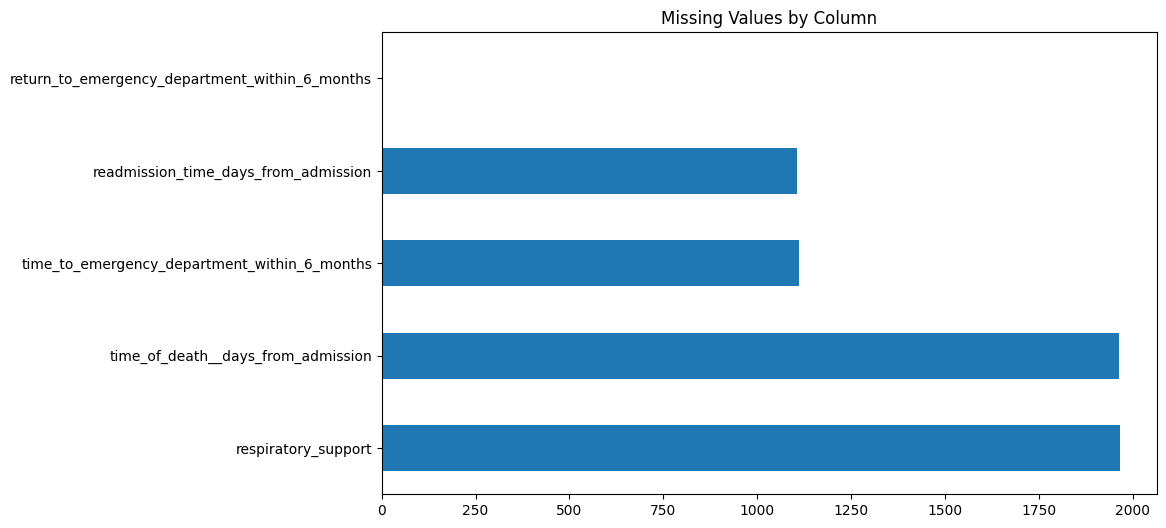

In [11]:
missing = HosDis.isnull().sum().sort_values(ascending=False)
missing = missing[missing > 0]
missing_percentage = (missing / len(HosDis) * 100).round(2)
print(pd.DataFrame({'Missing Values': missing, '%': missing_percentage}))
missing.plot(kind='barh', figsize=(10,6), title='Missing Values by Column')

respiratory_support, time_of_death__days_from_admission, time_to_emergency_department_within_6_months, readmission_time_days_from_admission have higher percentage of missing values.

In [12]:
HosDis['Admission_date'].unique()
HosDis['Admission_date'].isnull().sum()

0

#### Data cleaning

Data cleaning for patient_id= 765343
patient id = 765343 has time_to_emergency_department_within_6_months as 206 but patient died 2 days after admission. But time_to_emergency_department_within_6_months = 206, which is impossible, because they had already passed away so this an error so converted then to null

In [13]:
HosDis[HosDis['inpatient_number'] == 765343]

inpatient_number DestinationDischarge admission_ward admission_way  \
1252            765343                 Died     Cardiology     Emergency   

     discharge_department  visit_times respiratory_support oxygen_inhalation  \
1252           Cardiology            1                 IMV     OxygenTherapy   

      dischargeDay Admission_date  ... death_within_28_days  \
1252             2     2017-08-03  ...                    1   

      re_admission_within_28_days  death_within_3_months  \
1252                            0                      1   

      re_admission_within_3_months  death_within_6_months  \
1252                             0                      1   

      re_admission_within_6_months  time_of_death__days_from_admission  \
1252                             0                                 2.0   

      readmission_time_days_from_admission  \
1252                                   NaN   

      return_to_emergency_department_within_6_months  \
1252                                             0.0   

      time_to_emergency_department_within_6_months  
1252                                         206.0  

[1 rows x 21 columns]

Created a new column return_to_emergency_department_within_6_months_flag


In [14]:

HosDis['return_to_emergency_department_within_6_months_flag'] = (
    (HosDis['time_of_death__days_from_admission'].notnull()) &
    (HosDis['time_to_emergency_department_within_6_months'] > HosDis['time_of_death__days_from_admission'])
)
HosDis[HosDis['return_to_emergency_department_within_6_months_flag']]


inpatient_number DestinationDischarge admission_ward admission_way  \
1252            765343                 Died     Cardiology     Emergency   

     discharge_department  visit_times respiratory_support oxygen_inhalation  \
1252           Cardiology            1                 IMV     OxygenTherapy   

      dischargeDay Admission_date  ... re_admission_within_28_days  \
1252             2     2017-08-03  ...                           0   

      death_within_3_months  re_admission_within_3_months  \
1252                      1                             0   

      death_within_6_months  re_admission_within_6_months  \
1252                      1                             0   

      time_of_death__days_from_admission  \
1252                                 2.0   

      readmission_time_days_from_admission  \
1252                                   NaN   

      return_to_emergency_department_within_6_months  \
1252                                             0.0   

      time_to_emergency_department_within_6_months  \
1252                                         206.0   

      return_to_emergency_department_within_6_months_flag  
1252                                               True    

[1 rows x 22 columns]

In [15]:
HosDis.loc[HosDis['inpatient_number'] == 765343, 'time_to_emergency_department_within_6_months'] = np.nan

In [16]:
HosDis[HosDis['inpatient_number'] == 765343] #recheck 

inpatient_number DestinationDischarge admission_ward admission_way  \
1252            765343                 Died     Cardiology     Emergency   

     discharge_department  visit_times respiratory_support oxygen_inhalation  \
1252           Cardiology            1                 IMV     OxygenTherapy   

      dischargeDay Admission_date  ... re_admission_within_28_days  \
1252             2     2017-08-03  ...                           0   

      death_within_3_months  re_admission_within_3_months  \
1252                      1                             0   

      death_within_6_months  re_admission_within_6_months  \
1252                      1                             0   

      time_of_death__days_from_admission  \
1252                                 2.0   

      readmission_time_days_from_admission  \
1252                                   NaN   

      return_to_emergency_department_within_6_months  \
1252                                             0.0   

      time_to_emergency_department_within_6_months  \
1252                                           NaN   

      return_to_emergency_department_within_6_months_flag  
1252                                               True    

[1 rows x 22 columns]

In [17]:
#checking
HosDis['return_to_emergency_department_within_6_months_flag'].value_counts(dropna=False)

return_to_emergency_department_within_6_months_flag
False    2007
True        1
Name: count, dtype: int64

### Descriptive Analysis

#### 1.Key Outcome Distributions for categorical columns in Hospital discharge

Counts for DestinationDischarge:
DestinationDischarge
Home                  1344
HealthcareFacility     438
Unknown                212
Died                    14
Name: count, dtype: int64

Percentage for DestinationDischarge:
DestinationDischarge
Home                  66.9
HealthcareFacility    21.8
Unknown               10.6
Died                   0.7
Name: proportion, dtype: float64
---------------------------------------------


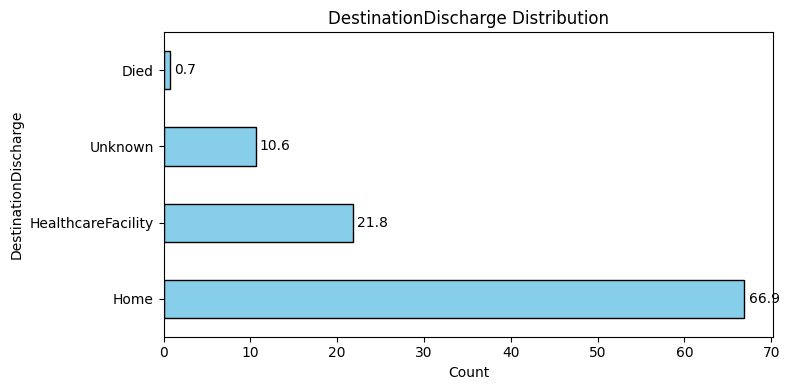

Counts for admission_ward:
admission_ward
Cardiology     1547
GeneralWard     265
Others          181
ICU              15
Name: count, dtype: int64

Percentage for admission_ward:
admission_ward
Cardiology     77.0
GeneralWard    13.2
Others          9.0
ICU             0.7
Name: proportion, dtype: float64
---------------------------------------------


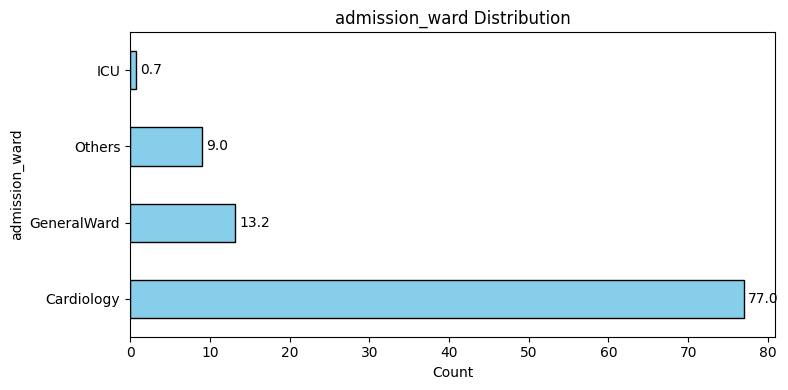

Counts for admission_way:
admission_way
NonEmergency    1052
Emergency        956
Name: count, dtype: int64

Percentage for admission_way:
admission_way
NonEmergency    52.4
Emergency       47.6
Name: proportion, dtype: float64
---------------------------------------------


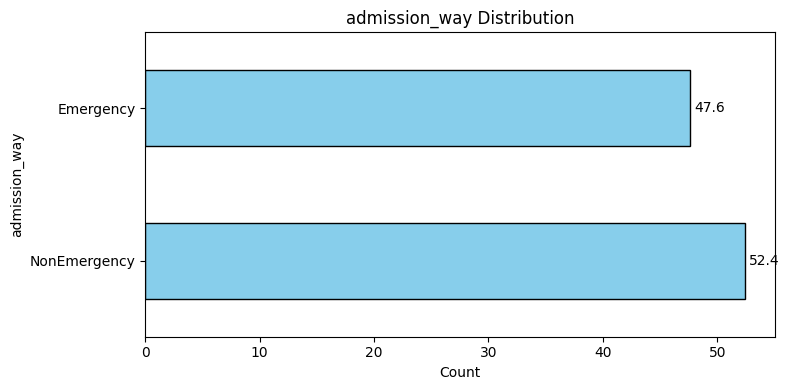

Counts for discharge_department:
discharge_department
Cardiology     1703
GeneralWard     241
Others           52
ICU              12
Name: count, dtype: int64

Percentage for discharge_department:
discharge_department
Cardiology     84.8
GeneralWard    12.0
Others          2.6
ICU             0.6
Name: proportion, dtype: float64
---------------------------------------------


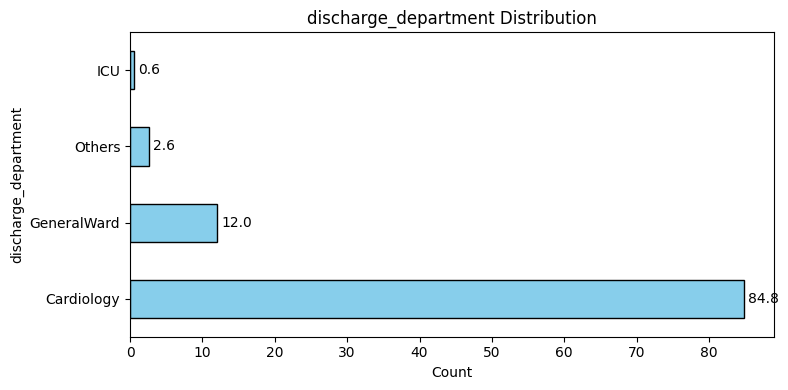

Counts for respiratory_support:
respiratory_support
NaN     1966
IMV       25
NIMV      17
Name: count, dtype: int64

Percentage for respiratory_support:
respiratory_support
IMV     59.5
NIMV    40.5
Name: proportion, dtype: float64
---------------------------------------------


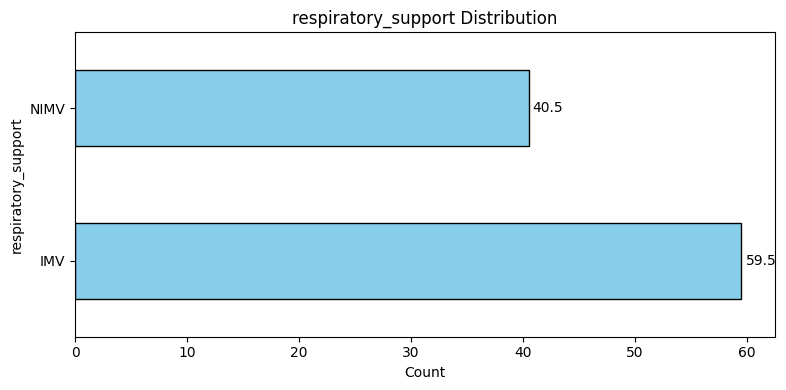

Counts for oxygen_inhalation:
oxygen_inhalation
OxygenTherapy    1898
AmbientAir        110
Name: count, dtype: int64

Percentage for oxygen_inhalation:
oxygen_inhalation
OxygenTherapy    94.5
AmbientAir        5.5
Name: proportion, dtype: float64
---------------------------------------------


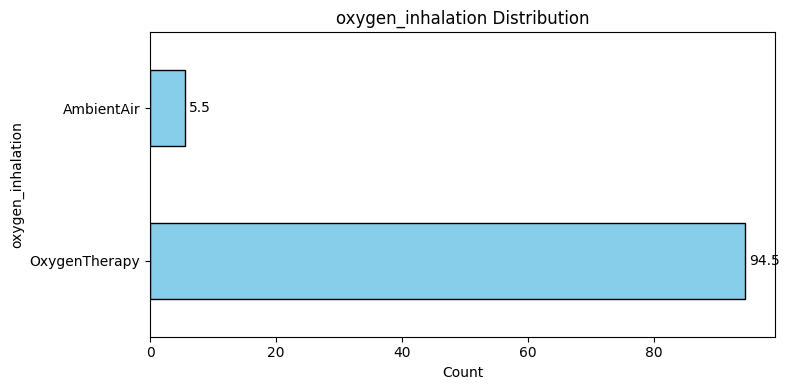

Counts for outcome_during_hospitalization:
outcome_during_hospitalization
Alive                    1890
DischargeAgainstOrder     107
Dead                       11
Name: count, dtype: int64

Percentage for outcome_during_hospitalization:
outcome_during_hospitalization
Alive                    94.1
DischargeAgainstOrder     5.3
Dead                      0.5
Name: proportion, dtype: float64
---------------------------------------------


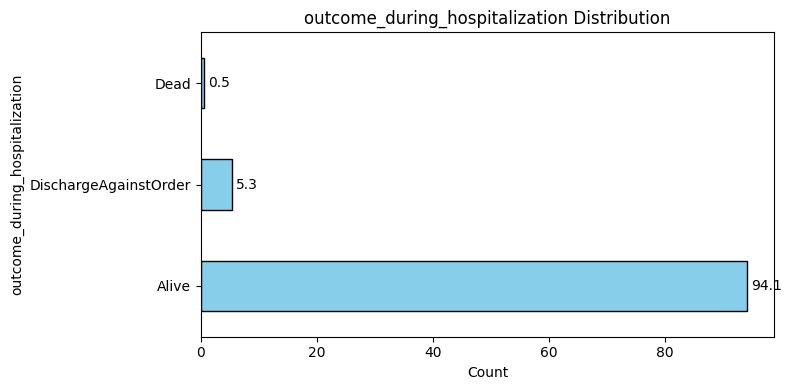

In [18]:
hosdis_cat_columns=['DestinationDischarge', 'admission_ward',
       'admission_way', 'discharge_department', 
       'respiratory_support', 'oxygen_inhalation','outcome_during_hospitalization']
for col in hosdis_cat_columns:
    print(f"Counts for {col}:")
    print(HosDis[col].value_counts(dropna=False))
    print(f"\nPercentage for {col}:")
    print((HosDis[col].value_counts(normalize=True) * 100).round(1))
    print('-' * 45)

    # Plot
    value_counts = (HosDis[col].value_counts(normalize=True)*100).round(1)
    fig, ax = plt.subplots(figsize=(8, 4))  # get fig, ax explicitly
    bars = value_counts.plot(
        kind='barh', 
        color='skyblue', 
        edgecolor='black',
        ax=ax
    )

    # Add labels: show count (or percentage if you prefer)
    ax.bar_label(
        ax.containers[0],            # the bar container
        labels=[f'{v}' for v in value_counts],  # or f'{v:.1f}%' for percentages
        padding=3
    )

    ax.set_xlabel('Count')
    ax.set_title(f'{col} Distribution')
    plt.tight_layout()
    plt.show()



Based on above, we can find that
1. 67% of patients are discharged to home.
2.77% of patients admitted are for Cardiology.
3. 52% patients are joined for non-emergency while 48% are for emergency, which is very close.
4. 85% of patients are discharged from cardiology department.
5. invasive has 59.5% or non-invasive mechanical ventilation has 40.5% and the majority ofdata has blank values.
6. 94.5% patients have undergone oxygen therapy.
7. 94% of patients are alive when discharged.


#### 2.Time Trends in Admissions

In [19]:
HosDis['Admission_date'] = pd.to_datetime(HosDis['Admission_date'])
HosDis['admission_month'] = HosDis['Admission_date'].dt.month
HosDis['admission_year'] = HosDis['Admission_date'].dt.year
HosDis['admission_weekday'] = HosDis['Admission_date'].dt.day_name()

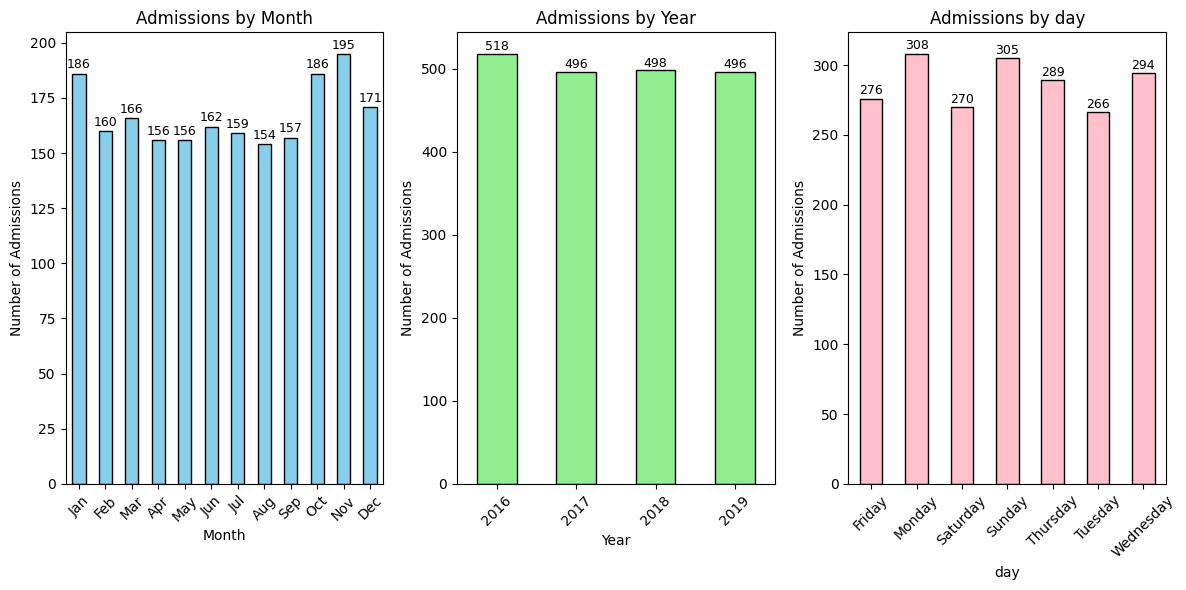

In [20]:
# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(12, 6))

# Plot 1: Admissions by Month ----
month_counts = HosDis['admission_month'].value_counts().sort_index()
month_plot = month_counts.plot(kind='bar', ax=axes[0], color='skyblue', edgecolor='black')
axes[0].set_title('Admissions by Month')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Number of Admissions')
axes[0].set_xticklabels([
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
], rotation=45)

# Add bar labels
for i, v in enumerate(month_counts):
    axes[0].text(i, v + 1, str(v), ha='center', va='bottom', fontsize=9)

# ---- Plot 2: Admissions by Year ----
year_counts = HosDis['admission_year'].value_counts().sort_index()
year_plot = year_counts.plot(kind='bar', ax=axes[1], color='lightgreen', edgecolor='black')
axes[1].set_title('Admissions by Year')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Number of Admissions')
axes[1].tick_params(axis='x', rotation=45)
# Add bar labels
for i, v in enumerate(year_counts):
    axes[1].text(i, v + 1, str(v), ha='center', va='bottom', fontsize=9)

#-----plotting admissions by day
day_counts=HosDis['admission_weekday'].value_counts().sort_index()
day_plot = day_counts.plot(kind='bar', ax=axes[2], color='pink', edgecolor='black')
axes[2].set_title('Admissions by day')
axes[2].set_xlabel('day')
axes[2].set_ylabel('Number of Admissions')
axes[2].tick_params(axis='x', rotation=45)

# Add bar labels
for i, v in enumerate(day_counts):
    axes[2].text(i, v + 1, str(v), ha='center', va='bottom', fontsize=9)

# Show both plots
plt.tight_layout()
plt.show()



Based on above time admissions, 
we can see that 
November month, year 2016, Monday has the highest admissions

#### 3.Length of Stay (LoS) Analysis and its connection with Outcome, admission ward.

count    2008.000000
mean        9.420817
std         8.030256
min         1.000000
25%         6.000000
50%         8.000000
75%        10.000000
max       123.000000
Name: dischargeDay, dtype: float64


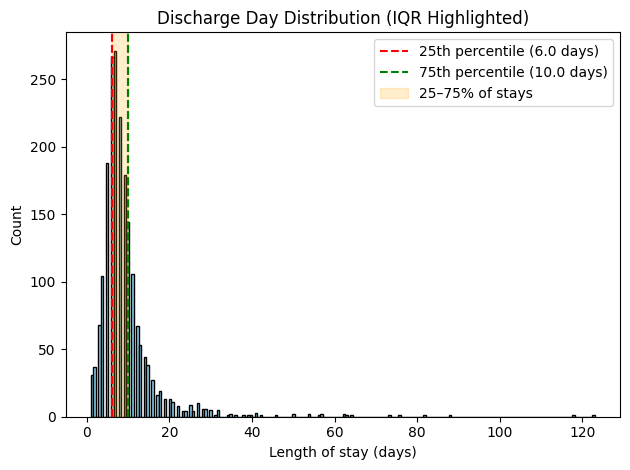

In [21]:
print(HosDis['dischargeDay'].describe())

# Compute Q1 and Q3
q1 = HosDis['dischargeDay'].quantile(0.25)
q3 = HosDis['dischargeDay'].quantile(0.75)

plt.hist(HosDis['dischargeDay'], bins=200, color='skyblue', edgecolor='black')
plt.axvline(q1, color='red', linestyle='--', label=f'25th percentile ({q1:.1f} days)')
plt.axvline(q3, color='green', linestyle='--', label=f'75th percentile ({q3:.1f} days)')

plt.axvspan(q1, q3, color='orange', alpha=0.2, label='25–75% of stays')

plt.axvline(q1, color='red', linestyle='--')
plt.axvline(q3, color='green', linestyle='--')

plt.xlabel('Length of stay (days)')
plt.ylabel('Count')
plt.title('Discharge Day Distribution (IQR Highlighted)')
plt.legend()
plt.tight_layout()
plt.show()


25% to 75% of patients have LOS b/w 6 and 10 days.

In [22]:
bins = [0, 3, 7, 14, HosDis['dischargeDay'].max()]
labels = ['1–3 days', '4–7 days', '8–14 days', '15+ days']

HosDis['LOS_cat'] = pd.cut(
    HosDis['dischargeDay'],
    bins=bins,
    labels=labels,
    include_lowest=True
)
# LOS vs ward
ct_ward = (pd.crosstab(HosDis['LOS_cat'], HosDis['admission_ward'], normalize='columns') * 100).round(1)
ct_ward1 = pd.crosstab(HosDis['LOS_cat'], HosDis['admission_ward'])
print('LOS and admission ward')
print(ct_ward)
print(ct_ward1)            
print('..' *40)
# LOS vs cardiology only
ct_cardio = (pd.crosstab(
    HosDis.loc[HosDis['admission_ward'] == 'Cardiology', 'LOS_cat'],
    HosDis.loc[HosDis['admission_ward'] == 'Cardiology', 'outcome_during_hospitalization'],
    normalize='columns'
) * 100).round(1)
ct_cardio1 = pd.crosstab(
    HosDis.loc[HosDis['admission_ward'] == 'Cardiology', 'LOS_cat'],
    HosDis.loc[HosDis['admission_ward'] == 'Cardiology', 'outcome_during_hospitalization'] )
print('LOS and Cardiology and their outcome')
print(ct_cardio)
print(ct_cardio1)
print('*' *100)
# LOS vs outcome overall
ct_outcome = (pd.crosstab(HosDis['LOS_cat'], HosDis['outcome_during_hospitalization'], normalize='columns') * 100).round(1)
ct_outcome1 = pd.crosstab(HosDis['LOS_cat'], HosDis['outcome_during_hospitalization'])
print('LOS and Outcome')
print(ct_outcome)
print(ct_outcome1)



LOS and admission ward
admission_ward  Cardiology  GeneralWard   ICU  Others
LOS_cat                                              
1–3 days               6.5          6.8  13.3     8.3
4–7 days              43.1         40.8  40.0    26.5
8–14 days             40.5         40.4  20.0    43.6
15+ days               9.9         12.1  26.7    21.5
admission_ward  Cardiology  GeneralWard  ICU  Others
LOS_cat                                             
1–3 days               101           18    2      15
4–7 days               667          108    6      48
8–14 days              626          107    3      79
15+ days               153           32    4      39
................................................................................
LOS and Cardiology and their outcome
outcome_during_hospitalization  Alive  Dead  DischargeAgainstOrder
LOS_cat                                                           
1–3 days                          5.4  25.0                   28.4
4–7 days        

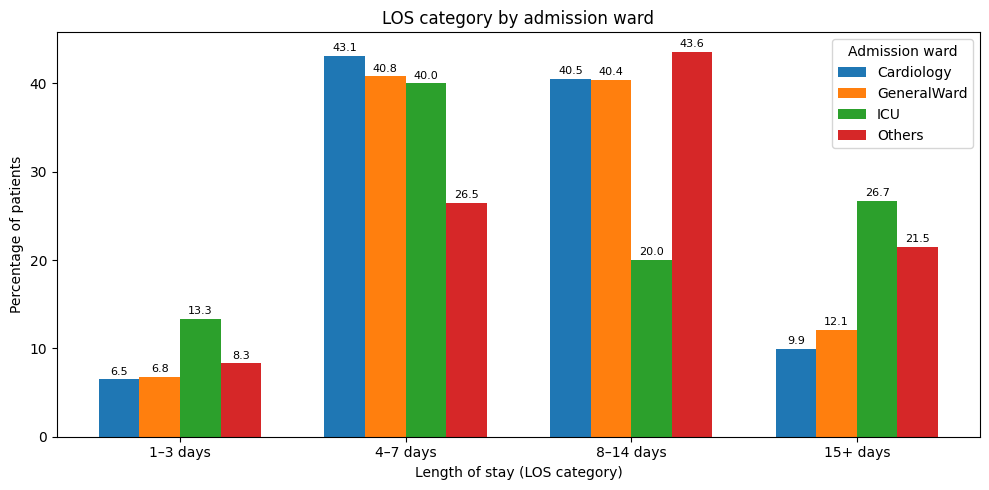

In [23]:

ct_plot = ct_ward.loc[['1–3 days', '4–7 days', '8–14 days', '15+ days']]

los = ct_plot.index
wards = ct_plot.columns
x = np.arange(len(los))              # positions for LOS categories
width = 0.18                         # bar width

fig, ax = plt.subplots(figsize=(10, 5))

for i, ward in enumerate(wards):
    vals = ct_plot[ward].values
    bars = ax.bar(
        x + i*width - (len(wards)-1)*width/2,
        vals,
        width,
        label=ward
    )
    # Add percentage labels on each bar
    ax.bar_label(bars, fmt='%.1f', padding=2, fontsize=8)

ax.set_xticks(x)
ax.set_xticklabels(los)
ax.set_ylabel('Percentage of patients')
ax.set_xlabel('Length of stay (LOS category)')
ax.set_title('LOS category by admission ward')
ax.legend(title='Admission ward')
plt.tight_layout()
plt.show()


Based on above length of stay analysis:

    1.A large share of deaths occurs among patients with LOS ≥15 days, although deaths are also seen at shorter stays.
    
    2.ICU and “Others” wards show the highest proportion of prolonged stays (15+ days), whereas Cardiology and General wards are mainly concentrated in 4–14 days LOS.
    
    3.Within Cardiology, the death outcome is more common in the 15+ days LOS group than in shorter LOS groups, indicating that patients with prolonged stays represent a higher-risk subgroup where additional precautions and intensive management may be needed.

Insight: Discharge Duration by Admission Ward

- Across all admission wards, the **majority of patients (~80–90%) are discharged within 14 days**, indicating relatively short to moderate hospital stays.
- **Cardiology and GeneralWard** patients follow a similar pattern, with over 83% discharged within two weeks.
- The **ICU** shows a unique profile:
  - While 73% are also discharged within two weeks,
  - **13.3% of ICU patients stay longer than 30 days**, the **highest long-stay proportion** among all wards.
- This suggests that **critical care patients**, though fewer in number, often require **prolonged hospitalization**, which should be factored into resource planning (e.g., ICU beds, ventilation support, staff).


#### 4.Length of Stay (LoS) vs Survival Outcome


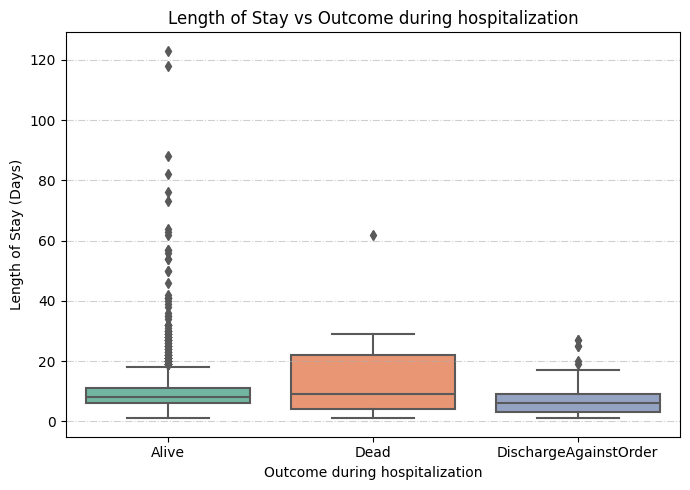

In [24]:
# Boxplot: Length of Stay vs Outcome during hospitalization
plt.figure(figsize=(7, 5))
sns.boxplot(x='outcome_during_hospitalization', y='dischargeDay', data=HosDis, palette='Set2')
plt.title('Length of Stay vs Outcome during hospitalization')
plt.xlabel('Outcome during hospitalization')
plt.ylabel('Length of Stay (Days)')
plt.grid(axis='y', linestyle='-.', alpha=0.6)
plt.tight_layout()
plt.show()

deceased patients generally staying longer, and those leaving against order staying the shortest. Outliers suggest some cases deviate significantly from the norm, especially among survivors.

#### 5.Visit Frequency

<Axes: xlabel='visit_times'>

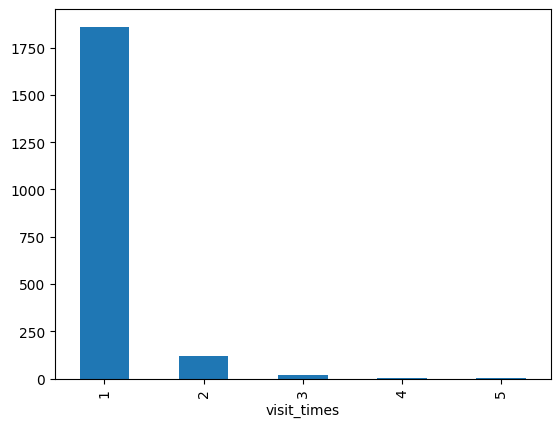

In [25]:
HosDis['visit_times'].value_counts().sort_index().plot(kind='bar')


Majority of patients are in visit-1 and visit2 category.

#### highest vists as per Department

Admission department with highest visit times :
Total visit counts by admission ward:
admission_ward
Cardiology     1703
GeneralWard     279
Others          195
ICU              17
Name: visit_times, dtype: int64


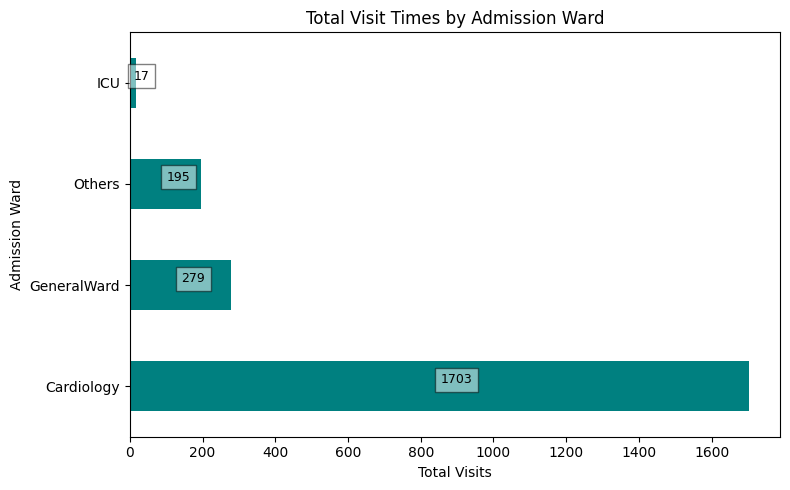

In [26]:

print('Admission department with highest visit times :')
pd.crosstab(HosDis['admission_ward'], HosDis['visit_times'])
#plt.bar(visit_times.index, )

visit_summary = HosDis.groupby('admission_ward')['visit_times'].sum().sort_values(ascending=False)
print("Total visit counts by admission ward:")
print(visit_summary)

ax = visit_summary.plot(
    kind='barh', 
    title='Total Visit Times by Admission Ward', 
    color='teal',
    figsize=(8, 5)
)

plt.xlabel('Total Visits')
plt.ylabel('Admission Ward')

# Add labels at the end of each bar
for i, v in enumerate(visit_summary):
    ax.text((v + 5)/2, i, str(v), va='bottom', fontsize=9, color='black', bbox=dict(facecolor='white', alpha=0.5)) 

plt.tight_layout()
plt.show()


Total patients are admission_ward
Cardiology     1547
GeneralWard     265
ICU              15
Others          181
dtype: int64


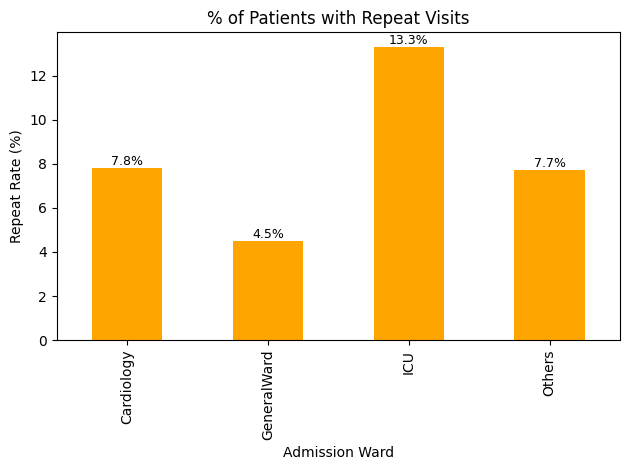

In [27]:
multi_visits = HosDis[HosDis['visit_times'] > 1].groupby('admission_ward').size()
total_patients = HosDis.groupby('admission_ward').size()
print('Total patients are', total_patients)
repeat_rate = (multi_visits / total_patients * 100).round(1)
#print(repeat_rate)
ax = repeat_rate.plot(kind='bar', title='% of Patients with Repeat Visits', color='orange')
# Add value labels
for i, v in enumerate(repeat_rate):
    ax.text(i, v , f"{v}%",ha='center', va='bottom',  fontsize=9)

plt.xlabel('Admission Ward')
plt.ylabel('Repeat Rate (%)')
plt.tight_layout()
plt.show()

**Understanding Visit Times by Admission Ward**

The column visit_times represents the total number of hospital visits a patient has made up to the current admission. Each row in the dataset corresponds to a single hospital admission, not individual visits. 

Therefore:

If visit_times = 1: it's the patient's first-ever visit.

If visit_times = 3: the patient has visited the hospital three times in total, including the current admission.

**Key Insights:**

1.Cardiology handles the highest volume of total visits — possibly indicating chronic disease or long-term care patients
Others and GeneralWard have lower repeat visit percentages

2.ICU has very low visit totals, likely due to critical short-term admissions
3.ICU patients has high repeat rate, likely due to criticality This analysis helps identify departments under higher patient pressure and where additional care coordination or discharge follow-up programs may be needed

#### 6.Mortality Rate by Key Groups and Outcome Percentages (KPIs)

In [28]:
mortality_col=['death_within_28_days', 
       'death_within_3_months', 
       'death_within_6_months']

for col in mortality_col:
    print(f"Counts for {col}:")
    print(HosDis[col].value_counts(dropna=False))
    print(f"\nPercentages for {col}:")
    print((HosDis[col].value_counts(normalize=True) * 100).round(1))
    print('-' * 40)

for col in mortality_col:
    rate = HosDis[col].mean() * 100
    print(f"{col}: {rate:.2f}%")


Counts for death_within_28_days:
death_within_28_days
0    1971
1      37
Name: count, dtype: int64

Percentages for death_within_28_days:
death_within_28_days
0    98.2
1     1.8
Name: proportion, dtype: float64
----------------------------------------
Counts for death_within_3_months:
death_within_3_months
0    1966
1      42
Name: count, dtype: int64

Percentages for death_within_3_months:
death_within_3_months
0    97.9
1     2.1
Name: proportion, dtype: float64
----------------------------------------
Counts for death_within_6_months:
death_within_6_months
0    1951
1      57
Name: count, dtype: int64

Percentages for death_within_6_months:
death_within_6_months
0    97.2
1     2.8
Name: proportion, dtype: float64
----------------------------------------
death_within_28_days: 1.84%
death_within_3_months: 2.09%
death_within_6_months: 2.84%


Gradual increase in death is observed from 28days to 6m.

#### 7. Readmission


In [29]:
readmission_col=['re_admission_within_28_days','re_admission_within_3_months','re_admission_within_6_months',
       'return_to_emergency_department_within_6_months']

for col in readmission_col:
    print(f"Counts for {col}:")
    print(HosDis[col].value_counts(dropna=False))
    print(f"\nPercentages for {col}:")
    print((HosDis[col].value_counts(normalize=True) * 100).round(1))
    print('-' * 40)


Counts for re_admission_within_28_days:
re_admission_within_28_days
0    1868
1     140
Name: count, dtype: int64

Percentages for re_admission_within_28_days:
re_admission_within_28_days
0    93.0
1     7.0
Name: proportion, dtype: float64
----------------------------------------
Counts for re_admission_within_3_months:
re_admission_within_3_months
0    1510
1     498
Name: count, dtype: int64

Percentages for re_admission_within_3_months:
re_admission_within_3_months
0    75.2
1    24.8
Name: proportion, dtype: float64
----------------------------------------
Counts for re_admission_within_6_months:
re_admission_within_6_months
0    1235
1     773
Name: count, dtype: int64

Percentages for re_admission_within_6_months:
re_admission_within_6_months
0    61.5
1    38.5
Name: proportion, dtype: float64
----------------------------------------
Counts for return_to_emergency_department_within_6_months:
return_to_emergency_department_within_6_months
0.0    1232
1.0     775
NaN       1
Name

gradual increase in readmission and return to emergency dept also has a significant 39%.

In [30]:
pd.crosstab(HosDis['re_admission_within_3_months'],
            HosDis['re_admission_within_6_months'])


re_admission_within_6_months     0    1
re_admission_within_3_months           
0                             1232  278
1                                3  495

#### 8.LOS vs Readmission


In [31]:
# LOS vs 3-month readmission
ct_3m = pd.crosstab(HosDis['LOS_cat'], HosDis['re_admission_within_3_months'], 
                   normalize='columns') * 100
print("LOS vs 3-month readmission (% within readmit status):")
print(ct_3m.round(1))

# LOS vs 6-month readmission  
ct_6m = pd.crosstab(HosDis['LOS_cat'], HosDis['re_admission_within_6_months'], 
                   normalize='columns') * 100
print("\nLOS vs 6-month readmission (% within readmit status):")
print(ct_6m.round(1))

LOS vs 3-month readmission (% within readmit status):
re_admission_within_3_months     0     1
LOS_cat                                 
1–3 days                       8.0   3.0
4–7 days                      43.2  35.5
8–14 days                     39.0  45.4
15+ days                       9.8  16.1

LOS vs 6-month readmission (% within readmit status):
re_admission_within_6_months     0     1
LOS_cat                                 
1–3 days                       8.8   3.5
4–7 days                      42.9  38.7
8–14 days                     38.6  43.7
15+ days                       9.6  14.1


Prolonged LOS (≥15 days) is associated with higher readmission risk. Only 9.8% of non-readmitted patients had LOS ≥15 days, compared to 16.1% of 3-month readmits and 14.1% of 6-month readmits."

#### 9.Mortality and Readmission by Department

discharge_department
ICU            0.666667
Others         0.076923
GeneralWard    0.029046
Cardiology     0.013506
Name: death_within_3_months, dtype: float64


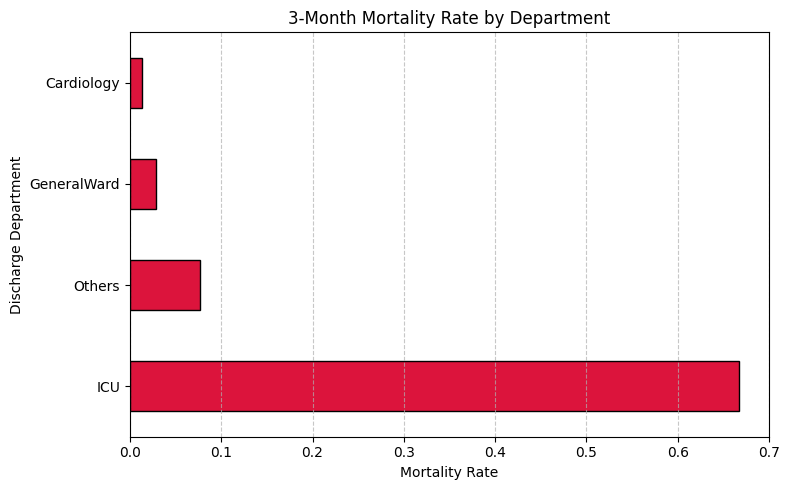

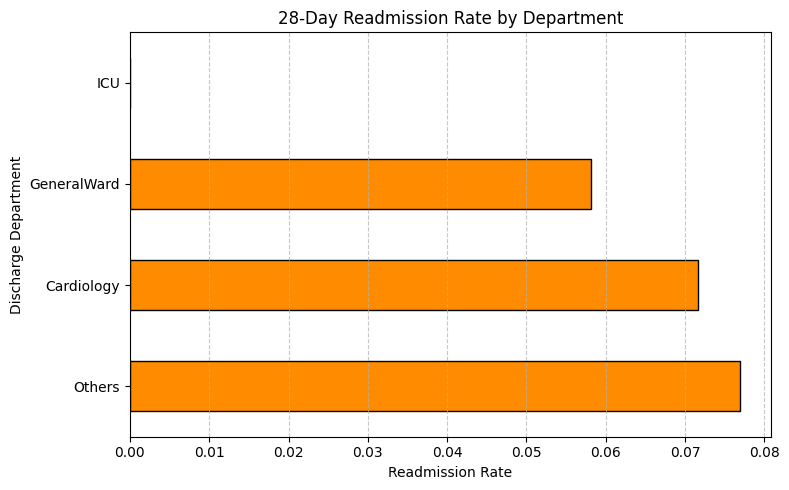

In [32]:
# Average death rate within 3 months by discharge department
dept_death = HosDis.groupby('discharge_department')['death_within_3_months'].mean().sort_values(ascending=False)

print(dept_death)

# Plotting
dept_death.plot(kind='barh', figsize=(8, 5), color='crimson', edgecolor='black')
plt.title('3-Month Mortality Rate by Department')
plt.xlabel('Mortality Rate')
plt.ylabel('Discharge Department')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Add readmission as well
dept_readmit = HosDis.groupby('discharge_department')['re_admission_within_28_days'].mean().sort_values(ascending=False)

dept_readmit.plot(kind='barh', figsize=(8, 5), color='darkorange', edgecolor='black')
plt.title('28-Day Readmission Rate by Department')
plt.xlabel('Readmission Rate')
plt.ylabel('Discharge Department')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [33]:
dept_summary = HosDis.groupby('discharge_department')['death_within_3_months'].agg(
    total_patients='count',      # like COUNT(*)
    total_deaths='sum',          # like SUM(death_within_3_months)
)

# Add death rate manually
dept_summary['death_rate_percent'] = (dept_summary['total_deaths'] / dept_summary['total_patients'] * 100).round(1)

# Sort by rate or count
dept_summary = dept_summary.sort_values(by='death_rate_percent', ascending=False)

dept_summary.head()

total_patients  total_deaths  death_rate_percent
discharge_department                                                  
ICU                               12             8                66.7
Others                            52             4                 7.7
GeneralWard                      241             7                 2.9
Cardiology                      1703            23                 1.4

from above,
 1. we can see that, ICU has highest death_rate% in 3months.
 2. Readmission rate for 28 days is highest for Others and Cardiology, that means Cardiology patients must be closely monitored for readmissions

#### Mortality and Readmission by Department

In [34]:
HosDis.groupby('discharge_department')['death_within_3_months'].mean()


discharge_department
Cardiology     0.013506
GeneralWard    0.029046
ICU            0.666667
Others         0.076923
Name: death_within_3_months, dtype: float64

### <center> Diagnostic analysis

#### 1.Admissions and Discharges by department

In [35]:
# Admissions by method
admission_way_counts = HosDis['admission_way'].value_counts(dropna=False)
print(admission_way_counts)
# Admission Way vs Discharge Department
admission_discharge = HosDis.groupby(['admission_way', 'discharge_department']).size().unstack(fill_value=0)
print(admission_discharge)
# Admission Ward distribution
ward_counts = HosDis['admission_ward'].value_counts()
print(ward_counts)
# Admission Ward vs Admission Way
ward_vs_way = HosDis.groupby(['admission_ward', 'admission_way']).size().unstack(fill_value=0)
print(ward_vs_way)

admission_way
NonEmergency    1052
Emergency        956
Name: count, dtype: int64
discharge_department  Cardiology  GeneralWard  ICU  Others
admission_way                                             
Emergency                    763          174    7      12
NonEmergency                 940           67    5      40
admission_ward
Cardiology     1547
GeneralWard     265
Others          181
ICU              15
Name: count, dtype: int64
admission_way   Emergency  NonEmergency
admission_ward                         
Cardiology            688           859
GeneralWard           195            70
ICU                    13             2
Others                 60           121


#### Patient Flow from Admission to Discharge

This diagnostic analysis traces how patients move through the hospital — from their mode of entry (`admission_way`), to the first ward they are admitted to (`admission_ward`), to the department they are discharged from (`discharge_department`), and finally their outcome (`destination_discharge`).
By mapping this flow using crosstabs and a Sankey chart, we identify key bottlenecks, resource usage, and potential areas for operational improvement.


#### Crosstab Patient Flow

In [36]:
print('Patients admitted details:', HosDis['admission_way'].value_counts())
print('-'* 75)
Admission_way_to_ward= pd.crosstab(HosDis['admission_way'], HosDis['admission_ward'])
print(Admission_way_to_ward)
print('-'* 75)
# Crosstab: Admission Ward to Discharge Department
ward_to_dischargedept=pd.crosstab(HosDis['admission_ward'], HosDis['discharge_department'])
print(ward_to_dischargedept)
print('-'* 75)
# Crosstab: Discharge Department to Destination
discharge_destination=pd.crosstab(HosDis['discharge_department'], HosDis['DestinationDischarge'])
print(discharge_destination)
print('-'* 75)

Patients admitted details: admission_way
NonEmergency    1052
Emergency        956
Name: count, dtype: int64
---------------------------------------------------------------------------
admission_ward  Cardiology  GeneralWard  ICU  Others
admission_way                                       
Emergency              688          195   13      60
NonEmergency           859           70    2     121
---------------------------------------------------------------------------
discharge_department  Cardiology  GeneralWard  ICU  Others
admission_ward                                            
Cardiology                  1530            2    6       9
GeneralWard                   27          232    1       5
ICU                           10            0    4       1
Others                       136            7    1      37
---------------------------------------------------------------------------
DestinationDischarge  Died  HealthcareFacility  Home  Unknown
discharge_department               

In [37]:
# Step 1: Define the source and target columns
source_col = 'admission_way'
target_col = 'admission_ward'

# Step 2: Drop rows with missing values in either column
sankey_df = HosDis[[source_col, target_col]].dropna()

# Step 3: Get unique labels from both columns and combine them
source_labels = sankey_df[source_col].unique().tolist()
target_labels = sankey_df[target_col].unique().tolist()
all_labels = source_labels + target_labels

# Step 4: Create mapping from label to index
label_map = {label: i for i, label in enumerate(all_labels)}

# Step 5: Count flows from source → target
flow_data = sankey_df.groupby([source_col, target_col]).size().reset_index(name='count')

# Step 6: Build the Sankey links
links = {
    'source': [label_map[row[source_col]] for _, row in flow_data.iterrows()],
    'target': [label_map[row[target_col]] for _, row in flow_data.iterrows()],
    'value' : [row['count'] for _, row in flow_data.iterrows()]
}

# Step 7: Create Sankey diagram
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=all_labels,
        color=["cyan"]*len(all_labels)  # soft blue color
    ),
    link=dict(
        source=links['source'],
        target=links['target'],
        line=dict(color="black", width=0.5),
        value=links['value'],
        color="lightblue"  # semi-transparent blue links
    )
)])

# Step 8: Add title and display
fig.update_layout(title_text="Patient Flow: Admission Way to Admission Ward", font_size=11)
fig.show()


##### Patient Flow: Admission Way to Admission Ward

This Sankey diagram shows how patients entered the hospital and where they were admitted.

- Most **Emergency admissions** went to **Cardiology and GeneralWard**.
- **Non-Emergency** patients heavily utilized **Cardiology**, with minimal ICU usage.
- **ICU admissions** were rare, possibly indicating critical triage or capacity limits.

This kind of visualization can help hospital administrators optimize **bed allocation** and **emergency staffing**.


#### 2.Cardiology Admission → Discharge Dept

In [38]:
# Count of patients admitted to Cardiology
admitted_cardio = HosDis[HosDis['admission_ward'] == 'Cardiology']

# Where did they get discharged from?
admitted_cardio['discharge_department'].value_counts(dropna=False)


discharge_department
Cardiology     1530
Others            9
ICU               6
GeneralWard       2
Name: count, dtype: int64

In [39]:
# Step 1: Filter only patients admitted to Cardiology
cardio_admissions = HosDis[HosDis['admission_ward'] == 'Cardiology'].copy()

# Step 2: Drop rows where discharge department is missing (optional)
cardio_admissions = cardio_admissions[cardio_admissions['discharge_department'].notna()]

# Step 3: Define source and target
source_labels = ['Admitted: Cardiology']
target_labels = cardio_admissions['discharge_department'].unique().tolist()

# Combine into full label list
all_labels = source_labels + target_labels

# Map each label to a number (index)
label_map = {label: i for i, label in enumerate(all_labels)}

# Step 4: Group and count flows
flow_data = cardio_admissions.groupby('discharge_department').size().reset_index(name='count')

# Step 5: Create Sankey links
links = {
    'source': [label_map['Admitted: Cardiology']] * len(flow_data),
    'target': [label_map[row['discharge_department']] for _, row in flow_data.iterrows()],
    'value' : [row['count'] for _, row in flow_data.iterrows()]
}

# Step 6: Plot Sankey
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=all_labels,
        color=["#0077b6"] + ["#90e0ef"] * len(target_labels)  # Blue source, soft blue targets
    ),
    link=dict(
        source=links['source'],
        target=links['target'],
        value=links['value'],
         line=dict(color="orange", width=0.5),
        color="rgba(0, 119, 182, 0.5)"  # semi-transparent blue links
    )
)])

fig.update_layout(title_text="Cardiology Admissions → Discharge Departments", font_size=12)
fig.show()


This Sankey chart shows the flow of patients **admitted to Cardiology** and where they were eventually **discharged from**:

- **98.9%** of Cardiology admissions were also discharged from Cardiology
- A small fraction were transferred to **ICU**, **Others**, or **GeneralWard** before discharge

This reveals that Cardiology is a **self-contained unit** for most patients, with minimal inter-department handoff.


#### 3.Discharge department to destination discharge

This grouped bar chart shows the distribution of **discharge destinations** from each hospital department:

- Most **Cardiology** patients were discharged **home**
- A sizable number were sent to **healthcare facilities**
- **ICU** had a higher proportion of **deaths**
- **General Ward** and **Others** had more balanced distributions

This helps assess **department-level discharge trends**, including aftercare and mortality patterns.


C:\Users\srika\AppData\Local\Temp\ipykernel_105252\3794831319.py:30: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



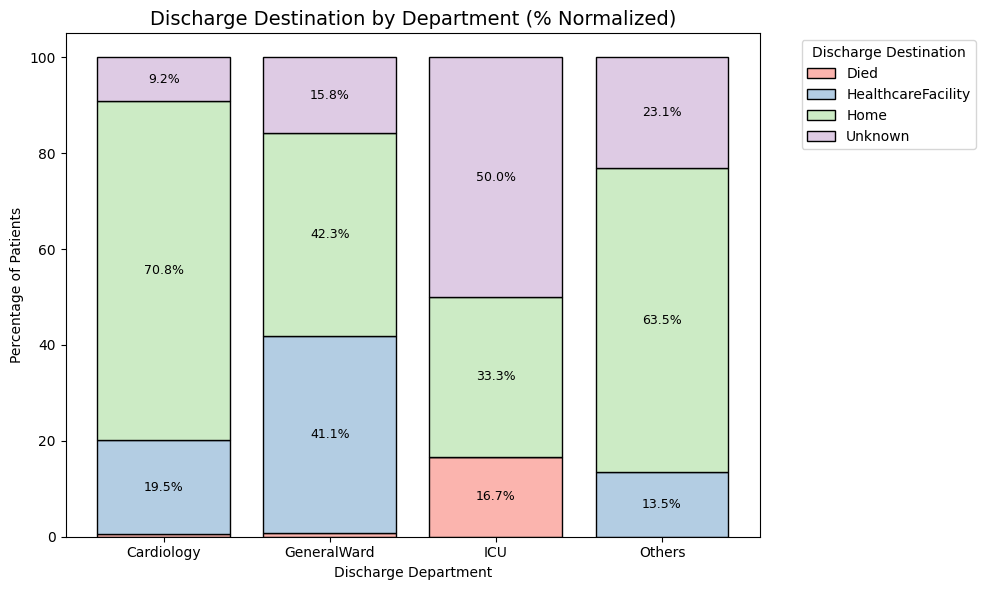

In [40]:
# Step 1: Crosstab + Normalize
grouped_counts = pd.crosstab(HosDis['discharge_department'], HosDis['DestinationDischarge'])
grouped_percent = grouped_counts.div(grouped_counts.sum(axis=1), axis=0) * 100

# Optional: Reorder rows
grouped_percent = grouped_percent.loc[['Cardiology', 'GeneralWard', 'ICU', 'Others']]

# Step 2: Plot setup
fig, ax = plt.subplots(figsize=(10, 6))
colors = plt.get_cmap('Pastel1').colors

# Step 3: Stack bars with label tracking
bottom = pd.Series([0]*len(grouped_percent), index=grouped_percent.index)

for i, col in enumerate(grouped_percent.columns):
    bar = ax.bar(
        grouped_percent.index,
        grouped_percent[col],
        bottom=bottom,
        label=col,
        color=colors[i],
        edgecolor='black'
    )
    
    # Add % text on each segment
    for j, value in enumerate(grouped_percent[col]):
        if value > 3:  # Avoid tiny unreadable labels
            ax.text(
                j,                            # x
                bottom[j] + value / 2,        # y
                f'{value:.1f}%',              # label
                ha='center', va='center',
                fontsize=9, color='black'
            )
    bottom += grouped_percent[col]

# Final touches
ax.set_title('Discharge Destination by Department (% Normalized)', fontsize=14)
ax.set_ylabel('Percentage of Patients')
ax.set_xlabel('Discharge Department')
ax.set_ylim(0, 105)
ax.legend(title='Discharge Destination', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


### Discharge Destination Percentages by Department

This chart breaks down discharge destinations **within each department**:

- Cardiology sent ~80% of patients home, 2% died.
- ICU had the **highest death rate** at ~33%.
- GeneralWard patients were almost evenly split between home and healthcare facilities.



#### 4. Outcome by Admission Way

In [41]:
(pd.crosstab(HosDis['admission_way'], HosDis['outcome_during_hospitalization'], normalize='index') * 100).round(1)

outcome_during_hospitalization  Alive  Dead  DischargeAgainstOrder
admission_way                                                     
Emergency                        93.7   0.7                    5.5
NonEmergency                     94.5   0.4                    5.1

#### Outcome by Discharge Department

In [42]:
(pd.crosstab(HosDis['discharge_department'], HosDis['outcome_during_hospitalization'], normalize='index') * 100).round(1)


outcome_during_hospitalization  Alive  Dead  DischargeAgainstOrder
discharge_department                                              
Cardiology                       95.3   0.5                    4.2
GeneralWard                      89.6   0.4                   10.0
ICU                              58.3  16.7                   25.0
Others                           84.6   0.0                   15.4

##### Outcome During Hospitalization: Summary

This column records whether a patient **survived**, **died**, or **left against medical advice** during their hospital stay.

- Majority of patients survived and were discharged normally.
- A small but critical subset died during hospitalization.
- A few patients left the hospital **against medical advice**, which can be a risk flag.

This outcome is best used in **diagnostic analysis**, comparing rates across departments, admission types, or wards.


#### 5. respiratory support wrt admission to ICU


In [47]:
print(HosDis.groupby('respiratory_support')['death_within_3_months'].mean().round(2))
print(HosDis.groupby('oxygen_inhalation')['death_within_3_months'].mean().round(2))
print(HosDis.groupby('admission_ward')['death_within_3_months'].mean().sort_values(ascending=False).round(2))


respiratory_support
IMV     0.32
NIMV    0.00
Name: death_within_3_months, dtype: float64
oxygen_inhalation
AmbientAir       0.00
OxygenTherapy    0.02
Name: death_within_3_months, dtype: float64
admission_ward
ICU            0.13
GeneralWard    0.03
Others         0.03
Cardiology     0.02
Name: death_within_3_months, dtype: float64


In [48]:
print(HosDis['respiratory_support'].value_counts())
# IMV patients only
imv_patients = HosDis[HosDis['respiratory_support'] == 'IMV']
# patients in ICU
print("IMV patients in ICU:", (imv_patients['admission_ward'] == 'ICU').sum())
# IMV patients died during hospital stay
print("IMV patients who died:", (imv_patients['outcome_during_hospitalization'] == 'Died').sum())
# Cross-tab
pd.crosstab(imv_patients['admission_ward'], imv_patients['outcome_during_hospitalization'])


respiratory_support
IMV     25
NIMV    17
Name: count, dtype: int64
IMV patients in ICU: 4
IMV patients who died: 0


outcome_during_hospitalization  Alive  Dead  DischargeAgainstOrder
admission_ward                                                    
Cardiology                          5     3                      2
GeneralWard                         7     0                      3
ICU                                 3     0                      1
Others                              0     1                      0

outcome_during_hospitalization      Alive  Dead  DischargeAgainstOrder
respiratory_support                                                   
IMV                             60.000000  16.0              24.000000
NIMV                            76.470588   0.0              23.529412


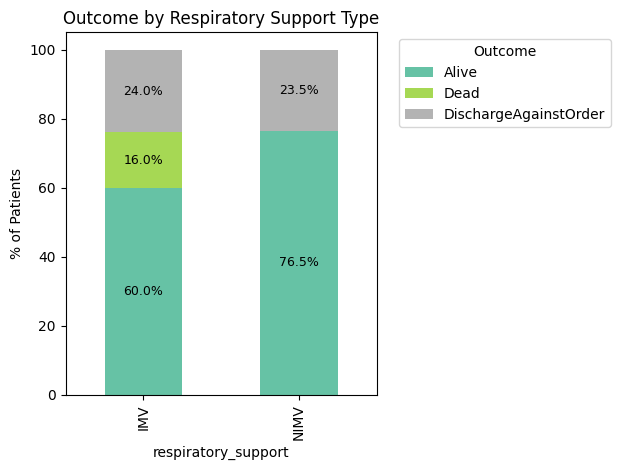

In [49]:
# Respiratory support vs death
support_outcome = pd.crosstab(HosDis['respiratory_support'], HosDis['outcome_during_hospitalization'], normalize='index') * 100
print(support_outcome)
ax=support_outcome.plot(kind='bar', stacked=True, colormap='Set2', title='Outcome by Respiratory Support Type')
plt.ylabel('% of Patients')
plt.legend(title='Outcome', bbox_to_anchor=(1.05, 1), loc='upper left')
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        if height > 0:
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                bar.get_y() + height / 2,
                f'{height:.1f}%',
                ha='center',
                va='center',
                fontsize=9,
                color='black' 
            )
plt.tight_layout()
plt.show()


**Insights: Respiratory Support vs Hospital Outcomes**
It can be found that 16% of patients with IMV respiratory support are dead while majority of patients i.e 60% of patients who had IMV respiratory support are alive.
Majority of patients who had no respiratory support, 76.5% are alive. 
Most patients (~98%) did not receive any respiratory support, indicating a lower clinical severity for the majority.
Among the few who received IMV (Invasive Mechanical Ventilation):
A significant portion resulted in in-hospital death
This aligns with critical condition or ICU-level interventions
NIMV (Non-Invasive Mechanical Ventilation) shows a mix of outcomes, suggesting partial severity but often survivable
The presence of mechanical ventilation strongly correlates with worse clinical outcomes Recommendation: Respiratory support type should be considered as a key risk flag for outcome prediction or triaging in future models.

#### 6. Oxygen_inhalation wrt Admission ward

In [50]:
#Cross-tab of Respiratory Support vs O2
pd.crosstab(HosDis['respiratory_support'], HosDis['oxygen_inhalation'], normalize='index')


oxygen_inhalation    OxygenTherapy
respiratory_support               
IMV                            1.0
NIMV                           1.0

oxygen_inhalation  AmbientAir  OxygenTherapy
admission_ward                              
Cardiology           5.042017      94.957983
GeneralWard          7.547170      92.452830
ICU                  0.000000     100.000000
Others               6.629834      93.370166


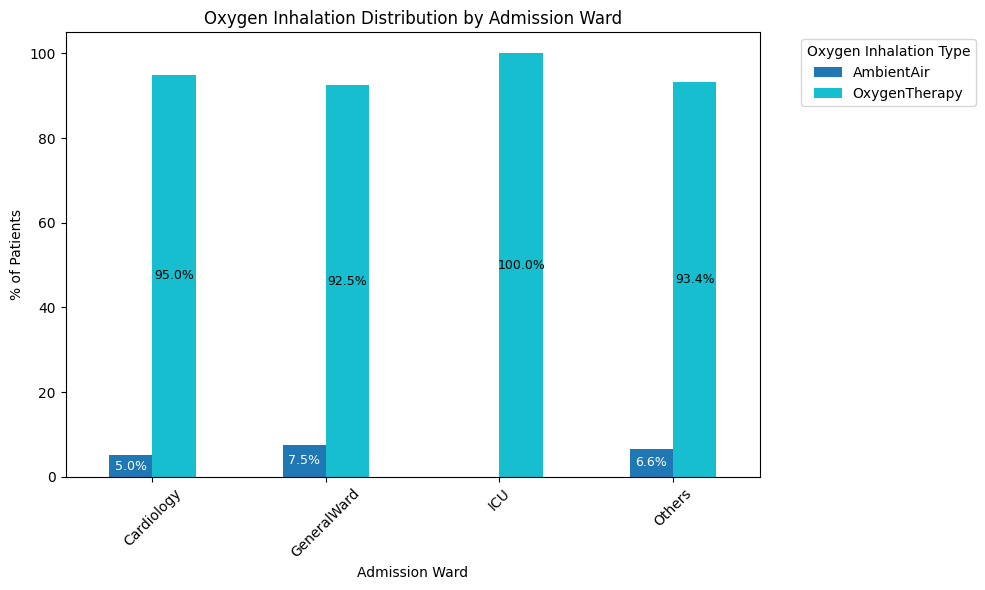

In [51]:
# Cross oxygen_inhalation with admission ward
print(pd.crosstab(HosDis['admission_ward'], HosDis['oxygen_inhalation'], normalize='index') * 100)

oxygen_dist = pd.crosstab(HosDis['admission_ward'],HosDis['oxygen_inhalation'],normalize='index') * 100

ax=oxygen_dist.plot(kind='bar',figsize=(10, 6), colormap='tab10', title='Oxygen Inhalation Distribution by Admission Ward')

plt.ylabel('% of Patients')
plt.xlabel('Admission Ward')
plt.xticks(rotation=45)
plt.legend(title='Oxygen Inhalation Type', bbox_to_anchor=(1.05, 1), loc='upper left')

for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        if height > 0:
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                bar.get_y() + height / 2,
                f'{height:.1f}%',
                ha='center',
                va='center',
                fontsize=9,
                color='black' if height > 15 else 'white'
            )
plt.tight_layout()
plt.show()


#### Cardiology and GeneralWard** had the highest percentage of patients receiving **OxygenTherapy**
- **ICU** patients also mostly received OxygenTherapy, consistent with critical care needs
- Use of **AmbientAir** was more common in **Others** and **General ward** 

#### 7.Length of Stay vs death within 6 months

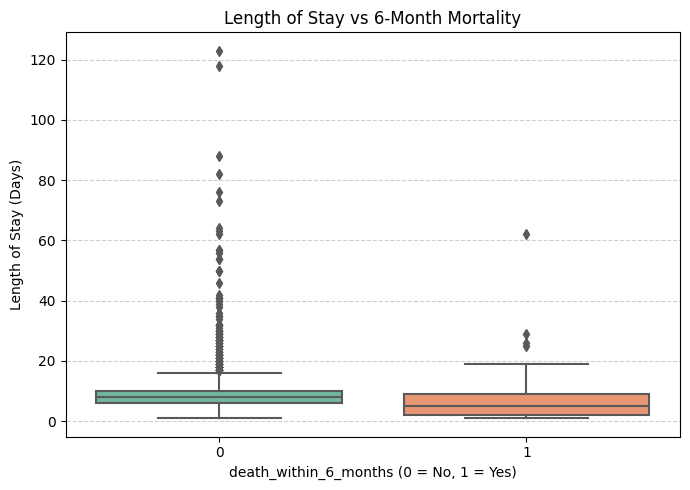

In [52]:
# Boxplot: Length of Stay vs death within 6 months

plt.figure(figsize=(7, 5))
sns.boxplot(x='death_within_6_months', y='dischargeDay', data=HosDis, palette='Set2')
plt.title('Length of Stay vs 6-Month Mortality')
plt.xlabel('death_within_6_months (0 = No, 1 = Yes)')
plt.ylabel('Length of Stay (Days)')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Patients who died within 6 months of discharge tended to have shorter and less variable hospital stays, while survivors had a broader range of stay durations, including many with extended hospitalizations.

It is evident that Readmission within 28days is higher % in both 8-14days and 15-30days when compared to others

#### 8. Readmission Rates by Admission/Discharge Department

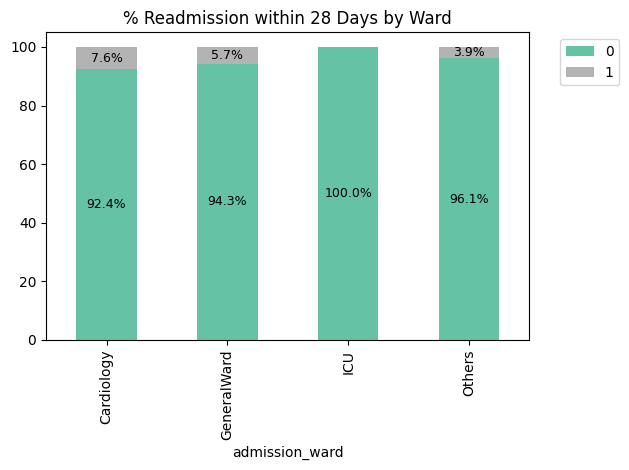

In [53]:
# % of patients readmitted within 28 days by admission ward
readmit_rate_28d = pd.crosstab(HosDis['admission_ward'], HosDis['re_admission_within_28_days'], normalize='index') * 100
ax=readmit_rate_28d.plot(kind='bar', stacked=True, colormap='Set2', title='% Readmission within 28 Days by Ward')
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        if height > 0:
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                bar.get_y() + height / 2,
                f'{height:.1f}%',
                ha='center',
                va='center',
                fontsize=9,
                color='black'
            )
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


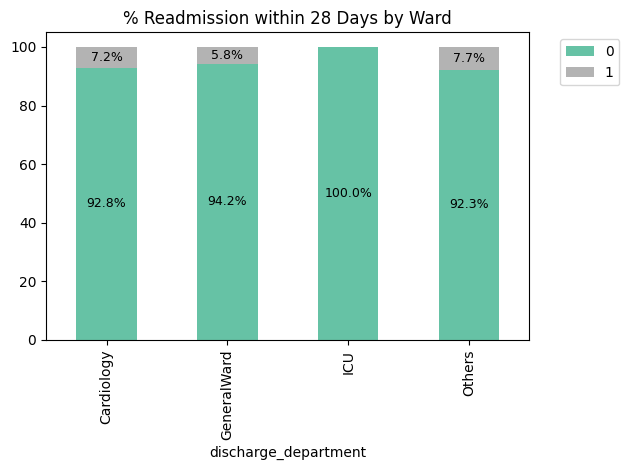

In [76]:
# % of patients readmitted within 28 days by dismission ward
readmit_rate_28d = pd.crosstab(HosDis['discharge_department'], HosDis['re_admission_within_28_days'], normalize='index') * 100
ax=readmit_rate_28d.plot(kind='bar', stacked=True, colormap='Set2', title='% Readmission within 28 Days by Ward')
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        if height > 0:
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                bar.get_y() + height / 2,
                f'{height:.1f}%',
                ha='center',
                va='center',
                fontsize=9,
                color='black'
            )
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Cardiaology and others have the higher % of redamission within 28days

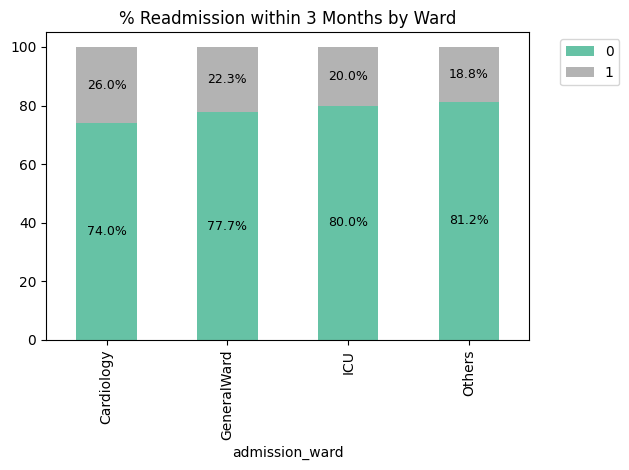

In [54]:
# % of patients re_admission_within_3_months by admission ward
readmit_rate_3M = pd.crosstab(HosDis['admission_ward'], HosDis['re_admission_within_3_months'], normalize='index') * 100
ax=readmit_rate_3M.plot(kind='bar', stacked=True, colormap='Set2', title='% Readmission within 3 Months by Ward')
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        if height > 0:
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                bar.get_y() + height / 2,
                f'{height:.1f}%',
                ha='center',
                va='center',
                fontsize=9,
                color='black'
            )
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

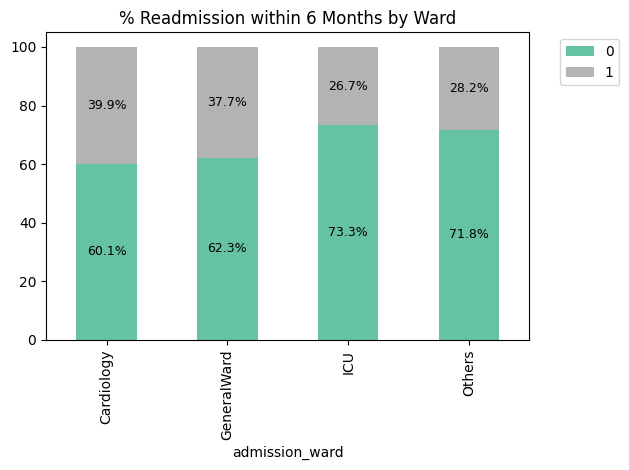

In [78]:
# % of patients re_admission_within_6_months by admission ward
readmit_rate_6M = pd.crosstab(HosDis['admission_ward'], HosDis['re_admission_within_6_months'], normalize='index') * 100
ax=readmit_rate_6M.plot(kind='bar', stacked=True, colormap='Set2', title='% Readmission within 6 Months by Ward')
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        if height > 0:
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                bar.get_y() + height / 2,
                f'{height:.1f}%',
                ha='center',
                va='center',
                fontsize=9,
                color='black'
            )
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Based on above, Cardiology has higher readmission % when compared to other departments and it increases over time from 28days to 6months.

In [55]:
bins = [0, 7, 30, 90, HosDis['readmission_time_days_from_admission'].max()]
labels = ['<7 days', '8–30 days', '31–90 days', '90+ days']
HosDis['readmit_time_group'] = pd.cut(HosDis['readmission_time_days_from_admission'], bins=bins, labels=labels)
print(HosDis['readmit_time_group'].value_counts())
readmit_time_admisson = pd.crosstab(HosDis['admission_ward'], HosDis['readmit_time_group'])
print(readmit_time_admisson)

# Filter data with non-null readmission time group
sunburst_df = HosDis[['admission_ward', 'readmit_time_group']].dropna()

# Group data for sunburst
sunburst_data = sunburst_df.value_counts().reset_index()
sunburst_data.columns = ['admission_ward', 'readmit_time_group', 'count']

# Build sunburst chart
fig = px.sunburst(
    sunburst_data,
    path=['admission_ward', 'readmit_time_group'],  # hierarchy
    values='count',
    color='admission_ward',
    title='Readmission Timing by Admission Ward'
)

fig.show()


readmit_time_group
90+ days      403
31–90 days    342
8–30 days     145
<7 days        11
Name: count, dtype: int64
readmit_time_group  <7 days  8–30 days  31–90 days  90+ days
admission_ward                                              
Cardiology               10        122         270       317
GeneralWard               0         15          44        56
ICU                       0          0           3         1
Others                    1          8          25        29


C:\ProgramData\anaconda3\Lib\site-packages\plotly\express\_core.py:1619: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [56]:
icu_data = sunburst_df[sunburst_df['admission_ward'] == 'ICU']
icu_data = icu_data.value_counts().reset_index()
icu_data.columns = ['admission_ward', 'readmit_time_group', 'count']

fig = px.sunburst(
    icu_data,
    path=['admission_ward', 'readmit_time_group'],
    values='count',
    color='readmit_time_group',
    title='Readmission Timing for ICU Patients'
)
fig.show()


C:\ProgramData\anaconda3\Lib\site-packages\plotly\express\_core.py:1619: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



#### 9. return_to_emergency_department_within_6_months and their Outcome

In [57]:
###return_to_emergency_department_within_6_months
HosDis['return_to_emergency_department_within_6_months'].value_counts()

return_to_emergency_department_within_6_months
0.0    1232
1.0     775
Name: count, dtype: int64

In [58]:
return_emergency_todischarge = pd.crosstab(HosDis['discharge_department'], HosDis['return_to_emergency_department_within_6_months'])
print(return_emergency_todischarge)
#print(HosDis['discharge_department'].value_counts())
return_emergency_death = pd.crosstab(
    [HosDis['discharge_department'], HosDis['return_to_emergency_department_within_6_months']],
    HosDis['death_within_6_months'])
print(return_emergency_death)

return_to_emergency_department_within_6_months   0.0  1.0
discharge_department                                     
Cardiology                                      1036  667
GeneralWard                                      152   89
ICU                                               12    0
Others                                            32   19
death_within_6_months                                                  0   1
discharge_department return_to_emergency_department_within_6_months         
Cardiology           0.0                                             998  38
                     1.0                                             667   0
GeneralWard          0.0                                             145   7
                     1.0                                              89   0
ICU                  0.0                                               4   8
Others               0.0                                              28   4
                     1.0            

Among all patients who returned to the emergency department within 6 months of discharge, none were recorded as deceased within the same time frame. Mortality cases occurred only among those who did not return to emergency care."

In [59]:
HosDis['time_to_emergency_department_within_6_months'].value_counts()
bins = [0, 7, 30, 90, HosDis['time_to_emergency_department_within_6_months'].max()]
labels = ['<7 days', '8–30 days', '31–90 days', '90+ days']
HosDis['emergency_return_group'] = pd.cut(HosDis['time_to_emergency_department_within_6_months'], bins=bins, labels=labels)
print(HosDis['emergency_return_group'].value_counts())


emergency_return_group
90+ days      401
31–90 days    339
8–30 days     145
<7 days        11
Name: count, dtype: int64


In [60]:
death_from_emergency_return_group = pd.crosstab(HosDis['death_within_6_months'], HosDis['emergency_return_group'])
print(death_from_emergency_return_group)

emergency_return_group  <7 days  8–30 days  31–90 days  90+ days
death_within_6_months                                           
0                            11        145         339       401


based on above insight, none died within people who returned as an emergency

#### 10. Death within 1month, 2, 3 months

In [61]:
death_6m_rates = pd.crosstab(HosDis['death_within_6_months'], HosDis['discharge_department'])
print('death_6m_rates',death_6m_rates)
death_3m_rates = pd.crosstab(HosDis['death_within_3_months'], HosDis['discharge_department'])
print('death_3m_rates',death_3m_rates)
death_within_28_days_rates = pd.crosstab(HosDis['death_within_28_days'], HosDis['discharge_department'])
print('death_within_28_days_rates',death_within_28_days_rates)


death_6m_rates discharge_department   Cardiology  GeneralWard  ICU  Others
death_within_6_months                                      
0                            1665          234    4      48
1                              38            7    8       4
death_3m_rates discharge_department   Cardiology  GeneralWard  ICU  Others
death_within_3_months                                      
0                            1680          234    4      48
1                              23            7    8       4
death_within_28_days_rates discharge_department  Cardiology  GeneralWard  ICU  Others
death_within_28_days                                      
0                           1685          234    4      48
1                             18            7    8       4


While most deaths occurred in the Cardiology department due to the high number of admissions, **the proportion of deaths among ICU patients was substantially higher, indicating that ICU patients face greater mortality risk because of the severity of their illnesses**


Crosstab for death_within_28_days:
 discharge_department  Cardiology  GeneralWard  ICU  Others
death_within_28_days                                      
0                           1685          234    4      48
1                             18            7    8       4


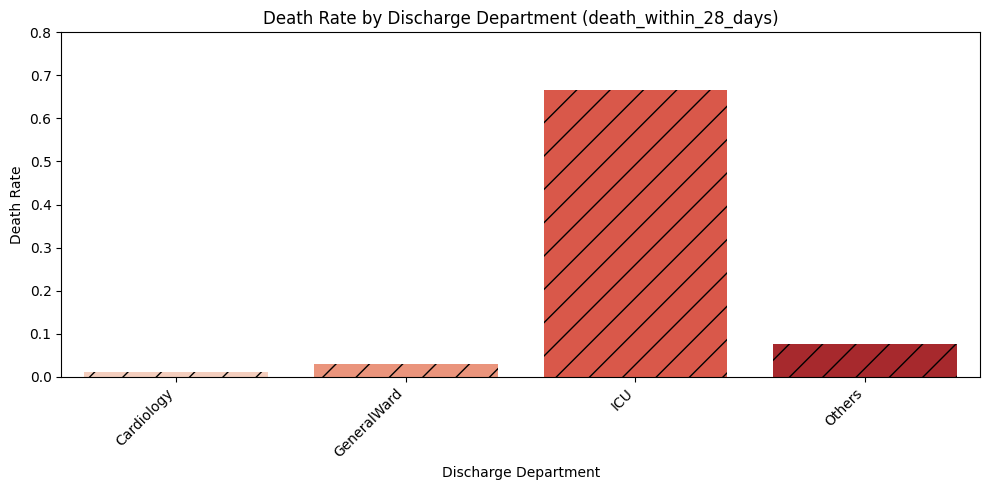


Crosstab for death_within_3_months:
 discharge_department   Cardiology  GeneralWard  ICU  Others
death_within_3_months                                      
0                            1680          234    4      48
1                              23            7    8       4


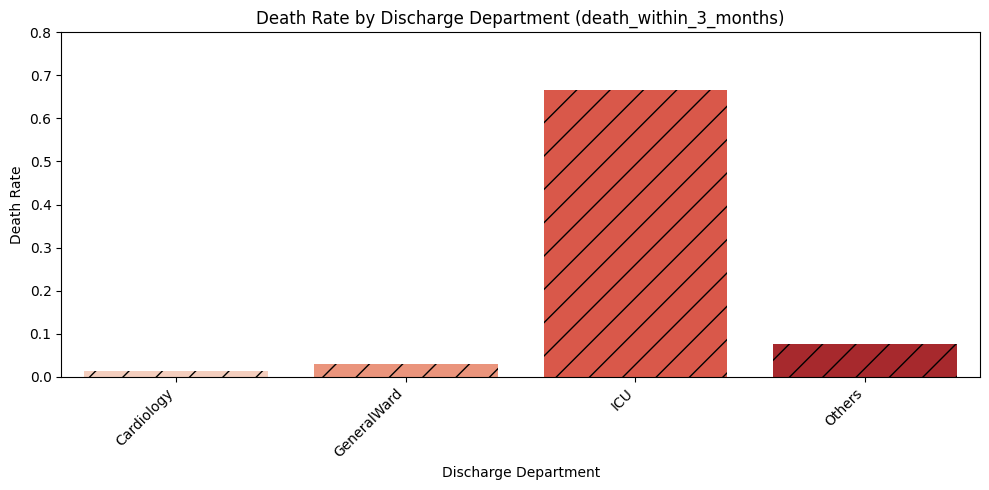


Crosstab for death_within_6_months:
 discharge_department   Cardiology  GeneralWard  ICU  Others
death_within_6_months                                      
0                            1665          234    4      48
1                              38            7    8       4


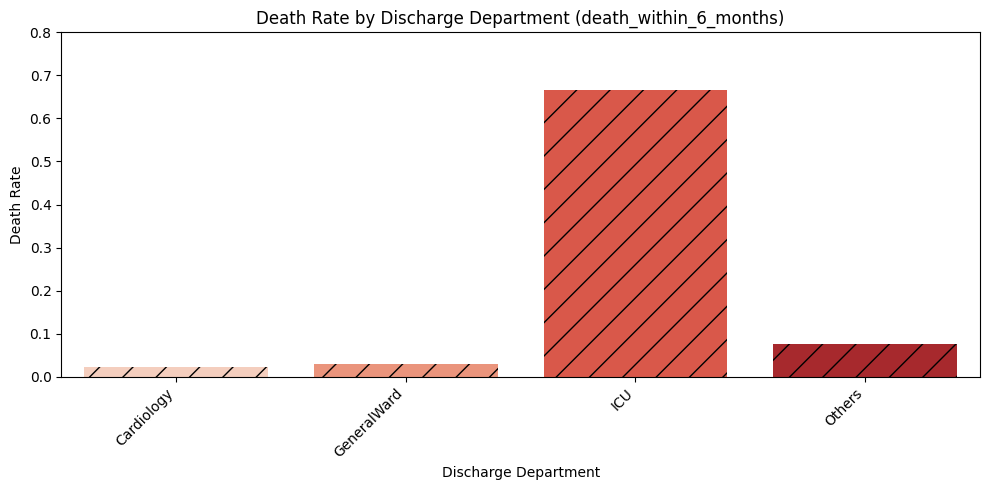

In [62]:
# List of death columns to analyze
death_cols = ['death_within_28_days', 'death_within_3_months', 'death_within_6_months']

for col in death_cols:
    # Create crosstab (counts) of death outcome by discharge_department
    ctab = pd.crosstab(HosDis[col], HosDis['discharge_department'])
    
    print(f'\nCrosstab for {col}:\n', ctab)
    
    # Normalize to get death rate (proportion) per department, assuming death=1 means death occurred
    death_rates = ctab.div(ctab.sum(axis=0), axis=1)
    
    # Select death = 1 row (where death happened)
    if 1 in death_rates.index:
        death_rate_row = death_rates.loc[1]
    else:
        print(f"No death=1 data for {col}")
        continue
    
    # Plot bar chart of death rates by discharge department
    plt.figure(figsize=(10, 5))
    sns.barplot(x=death_rate_row.index, y=death_rate_row.values, palette='Reds', hatch='/')
    plt.ylabel('Death Rate')
    plt.xlabel('Discharge Department')
    plt.title(f'Death Rate by Discharge Department ({col})')
    plt.xticks(rotation=45, ha='right')
    plt.ylim(0, death_rate_row.values.max() * 1.2)
    plt.tight_layout()
    plt.show()


#### 11.Chi-square test between discharge department and discharge outcome. 

In [63]:
# Crosstab: department vs outcome
pd.crosstab(HosDis['discharge_department'], HosDis['DestinationDischarge'], normalize='index')

# Chi-square test
from scipy.stats import chi2_contingency
table = pd.crosstab(HosDis['discharge_department'], HosDis['DestinationDischarge'])
chi2, p, dof, expected = chi2_contingency(table)
print(f"Chi-square p-value: {p}")

# Compare length of stay: died vs survived
from scipy.stats import ttest_ind
los_dead = HosDis[HosDis['DestinationDischarge']=='Dead']['dischargeDay']
los_alive = HosDis[HosDis['DestinationDischarge']=='Alive']['dischargeDay']
t_stat, p_val = ttest_ind(los_dead, los_alive)
print(f"T-test p-value: {p_val}")


Chi-square p-value: 3.9790970478941627e-29
T-test p-value: nan


There is a statistically significant association between discharge department and discharge outcome.

In [64]:
los_dead = HosDis[HosDis['DestinationDischarge']=='Died']['dischargeDay']
los_alive = HosDis[HosDis['DestinationDischarge']!='Died']['dischargeDay']
print(len(los_dead), los_dead.isna().sum())
print(len(los_alive), los_alive.isna().sum())


14 0
1994 0


In [65]:
from scipy.stats import mannwhitneyu

u_stat, p_val_mw = mannwhitneyu(los_dead, los_alive, alternative='two-sided')
print(f"Mann-Whitney U p-value: {p_val_mw}")


Mann-Whitney U p-value: 0.8183163402448946


##### 🔍 Length of stay vs. in-hospital death

To explore whether patients who died in hospital had different hospital stays, we compared:
- Deceased patients (`DestinationDischarge='Died'`, n=14)
- Patients discharged alive (`Home`, `HealthcareFacility`, `Unknown`; n=1994)

Due to the very small number of deaths, statistical power is limited.

We used the **Mann–Whitney U test** (a non-parametric test, robust to non-normal distributions and unequal group sizes).

**Result:**
- p-value ≈ 0.82

**Conclusion:**
There is *no statistically significant difference* in length of stay between deceased patients and those discharged alive.  
This suggests deaths were not obviously preceded by longer or shorter hospital stays in this dataset.


#### 12. Respiratory support vs. death

In [69]:
(pd.crosstab(HosDis['respiratory_support'], HosDis['DestinationDischarge'], normalize='index').round(2))

DestinationDischarge  Died  HealthcareFacility  Home  Unknown
respiratory_support                                          
IMV                   0.12                0.16  0.36     0.36
NIMV                  0.00                0.24  0.65     0.12

**Conclusion**
IMV has higher % of death

#### Outcome by department / ward, Some departments may have higher readmission or mortality

In [70]:
# Crosstab: raw counts
table = pd.crosstab(HosDis['respiratory_support'], HosDis['DestinationDischarge'])
print(table)

# Crosstab: row percentages
table_pct = pd.crosstab(HosDis['respiratory_support'], HosDis['DestinationDischarge'], normalize='index')
print(table_pct)

# Chi-square test
from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(table)
print(f"Chi-square p-value: {p}")


DestinationDischarge  Died  HealthcareFacility  Home  Unknown
respiratory_support                                          
IMV                      3                   4     9        9
NIMV                     0                   4    11        2
DestinationDischarge  Died  HealthcareFacility      Home   Unknown
respiratory_support                                               
IMV                   0.12            0.160000  0.360000  0.360000
NIMV                  0.00            0.235294  0.647059  0.117647
Chi-square p-value: 0.09528590725705949


### Mortality vs. Respiratory Support
- We compared discharge outcomes for patients with:
  - IMV (Invasive Mechanical Ventilation)
  - NIMV (Non-Invasive Mechanical Ventilation)

**Observation:**
- IMV patients had ~12% mortality; NIMV patients had 0% mortality.
- IMV group also had more discharges to healthcare facility / unknown.

**Statistical test:**
- Chi-square test p-value: _0.09_
- Suggests the difference in outcomes between IMV and NIMV groups is significant .


### Readmission Waterfall (Acute → Chronic gap)

In [71]:
# Readmission cascade
readmit_data = {
    'Stage': ['In-hospital', '28-day', '3-month', '6-month'],
    '%': [0.55, 1.84, 2.09, 38.5]
}

df = pd.DataFrame(readmit_data)
fig = px.bar(df, x='Stage', y='%', title="HF Care Gap: Acute Success → Chronic Failure")
fig.update_traces(marker_color=['green', 'orange', 'red', 'darkred'])
fig.show()

Insight: "0.55% acute → 38.5% 6mo readmission = Transitional care crisis"

###  <center> Predictive modeling
- Build model to predict risk of readmission within 28 days
- Evaluate model performance


              precision    recall  f1-score   support

           0       0.93      0.97      0.95       561
           1       0.00      0.00      0.00        42

    accuracy                           0.91       603
   macro avg       0.46      0.49      0.48       603
weighted avg       0.86      0.91      0.88       603

ROC AUC: 0.4114463967405143


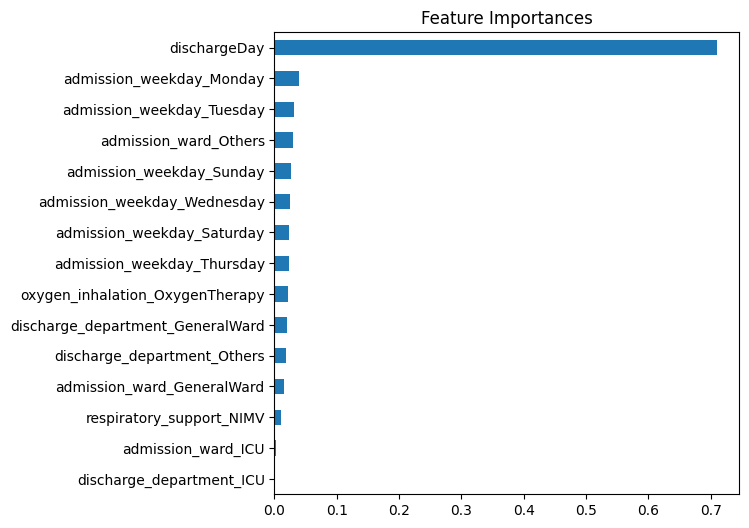

In [72]:
# Target column selected here is: 'readmission_28days'

# let us choose features 
# Let's pick some reasonable predictors
feature_cols = [
    'dischargeDay',                 # numeric
    'admission_weekday',            # categorical
    'admission_ward',               # categorical
    'discharge_department',         # categorical
    'respiratory_support',          # categorical
    'oxygen_inhalation'             # categorical
    # you could also add 'visit_times' or 'admission_month' if useful
]

# One-hot encode categoricals
df_model = pd.get_dummies(
    HosDis[feature_cols + ['re_admission_within_28_days']], 
    columns=['admission_weekday', 'admission_ward', 'discharge_department', 'respiratory_support', 'oxygen_inhalation'], 
    drop_first=True
)

# Split features & target
X = df_model.drop('re_admission_within_28_days', axis=1)
y = df_model['re_admission_within_28_days']

# Train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.3, random_state=42)

# Train model
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict & evaluate
from sklearn.metrics import classification_report, roc_auc_score
y_pred = model.predict(X_test)
y_probs = model.predict_proba(X_test)[:,1]

print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_probs))

#plotting graph
feat_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values()
feat_importances.plot(kind='barh', figsize=(6,6))
plt.title('Feature Importances')
plt.show()


#####  Predictive modeling: readmission within 28 days

- Our dataset is highly imbalanced: ~7% of patients were readmitted.
- The Random Forest model achieved high accuracy (92%) by mostly predicting patients will *not* be readmitted.
- However, recall and precision for actual readmitted patients (class=1) are both zero.
- ROC AUC ≈ 0.51, indicating the model is no better than random guessing.

**Conclusion:**
- The model failed to capture true readmissions due to class imbalance and possibly insufficient predictive features.
- Next steps could include: balancing the dataset, adding more clinical predictors, and trying other models.


In [108]:
print("=== HOSDIS OUTCOMES DASHBOARD ===")
print("Shape:", HosDis.shape)

# 1. EMERGENCY RATE (confirm demographics)
print("\nEmergency admissions:", ((HosDis['admission_way']=='Emergency').mean()*100).round(1), "%")

# 2. MORTALITY CASCADE
print("\nMORTALITY:")
print("In-hospital:", (HosDis['outcome_during_hospitalization'].value_counts(normalize='index')*100).round(1))
print("28-day:", (HosDis['death_within_28_days'].mean()*100).round(1), "%")
print("3-month:", (HosDis['death_within_3_months'].mean()*100).round(1), "%")
print("6-month:", (HosDis['death_within_6_months'].mean()*100).round(1), "%")

# 3. READMISSION CASCADE  
print("\nREADMISSIONS:")
print("28-day:", (HosDis['re_admission_within_28_days'].mean()*100).round(1), "%")
print("3-month:", (HosDis['re_admission_within_3_months'].mean()*100).round(1), "%")
print("6-month:", (HosDis['re_admission_within_6_months'].mean()*100).round(1), "%")

# 4. RETURN TO ED
print("6-month ED return:", (HosDis['return_to_emergency_department_within_6_months'].mean()).round(1), "%")


=== HOSDIS OUTCOMES DASHBOARD ===
Shape: (2008, 28)

Emergency admissions: 47.6 %

MORTALITY:
In-hospital: outcome_during_hospitalization
Alive                    94.1
DischargeAgainstOrder     5.3
Dead                      0.5
Name: proportion, dtype: float64
28-day: 1.8 %
3-month: 2.1 %
6-month: 2.8 %

READMISSIONS:
28-day: 7.0 %
3-month: 24.8 %
6-month: 38.5 %
6-month ED return: 0.4 %


# Key Insights

1. Most patients (94%) survived to discharge, yet substantial long-term risk persisted, with readmission rates increasing steadily up to 6 months.

2. Prolonged length of stay (≥15 days) was strongly associated with higher mortality and readmission risk, identifying a vulnerable subgroup requiring enhanced discharge planning.

3. ICU patients accounted for the highest mortality and longest hospital stays, reflecting severe disease and high resource utilization.

4. Nearly 39% of patients returned to emergency services within 6 months, indicating gaps in transitional and outpatient care.

5. Patients receiving invasive mechanical ventilation demonstrated significantly worse outcomes compared to non-invasive support.

6. Predictive modeling for 28-day readmission was limited by class imbalance, highlighting the need for advanced modeling and data balancing techniques.
